In [8]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%cd '/home/naodell/work/wbr/analysis'
np.set_printoptions(precision=3)
matplotlib.style.use('default')
params = {'legend.fontsize': 20,
          'axes.labelsize': 20,
          'figure.figsize': (8, 8),
          'axes.facecolor': 'white',
          'axes.titlesize':'x-large',
          'xtick.labelsize':18,
          'ytick.labelsize':18,
         }
matplotlib.rcParams.update(params)
%matplotlib inline
%connect_info

/home/naodell/work/wbr/analysis
{
  "shell_port": 58541,
  "iopub_port": 45951,
  "stdin_port": 42893,
  "control_port": 51761,
  "hb_port": 55977,
  "ip": "127.0.0.1",
  "key": "74ea7e42-0e965c8fc5657404b29215b8",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-79a1081c-1e6e-443a-a9e0-70b876911b65.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [9]:
# get data
df_yields = pd.read_csv('data/yields.csv')
df_yields['diff'] = df_yields.observed - df_yields.expected
labels = [r'$ee\ (N_{j} \geq 2, N_{b} = 0)$', r'$ee\ (N_{j} \geq 2, N_{b} = 1)$', r'$ee\ (N_{j} \geq 2, N_{b} \geq 2)$',
          r'$\mu\mu\ (N_{j} \geq 2, N_{b} = 0)$', r'$\mu\mu\ (N_{j} \geq 2, N_{b} = 1)$', r'$\mu\mu\ (N_{j} \geq 2, N_{b} \geq 2)$',
          r'$e\mu\ (N_{j} \geq 2, N_{b} = 0)$', r'$e\mu\ (N_{j} \geq 2, N_{b} = 1)$', r'$e\mu\ (N_{j} \geq 2, N_{b} \geq 2)$',
          r'$\mu h\ (N_{j} \geq 4, N_{b} = 1)$', r'$\mu h\ (N_{j} \geq 4, N_{b} \geq 2)$',
          r'$e h\ (N_{j} \geq 4, N_{b} = 1)$', r'$e h\ (N_{j} \geq 4, N_{b} \geq 2)$',
          r'$e\tau\ (N_{j} = 0, N_{b} = 0)$', r'$e\tau\ (N_{j} = 1, N_{b} = 0)$', r'$e\tau\ (N_{j} \geq 2, N_{b} = 0)$', r'$e\tau\ (N_{j} = 1, N_{b} = 1)$',
          r'$e\tau\ (N_{j} = 2, N_{b} = 1)$', r'$e\tau\ (N_{j} \geq 3, N_{b} = 1)$', r'$e\tau\ (N_{j} = 2, N_{b} \geq 2)$', r'$e\tau\ (N_{j} \geq 3, N_{b} \geq 2)$',
          r'$\mu\tau\ (N_{j} = 0, N_{b} = 0)$', r'$\mu\tau\ (N_{j} = 1, N_{b} = 0)$', r'$\mu\tau\ (N_{j} \geq 2, N_{b} = 0)$', r'$\mu\tau\ (N_{j} = 1, N_{b} = 1)$',
          r'$\mu\tau\ (N_{j} = 2, N_{b} = 1)$', r'$\mu\tau\ (N_{j} \geq 3, N_{b} = 1)$', r'$\mu\tau\ (N_{j} = 2, N_{b} \geq 2)$', r'$\mu\tau\ (N_{j} \geq 3, N_{b} \geq 2)$',
         ]
df_yields['labels'] = labels

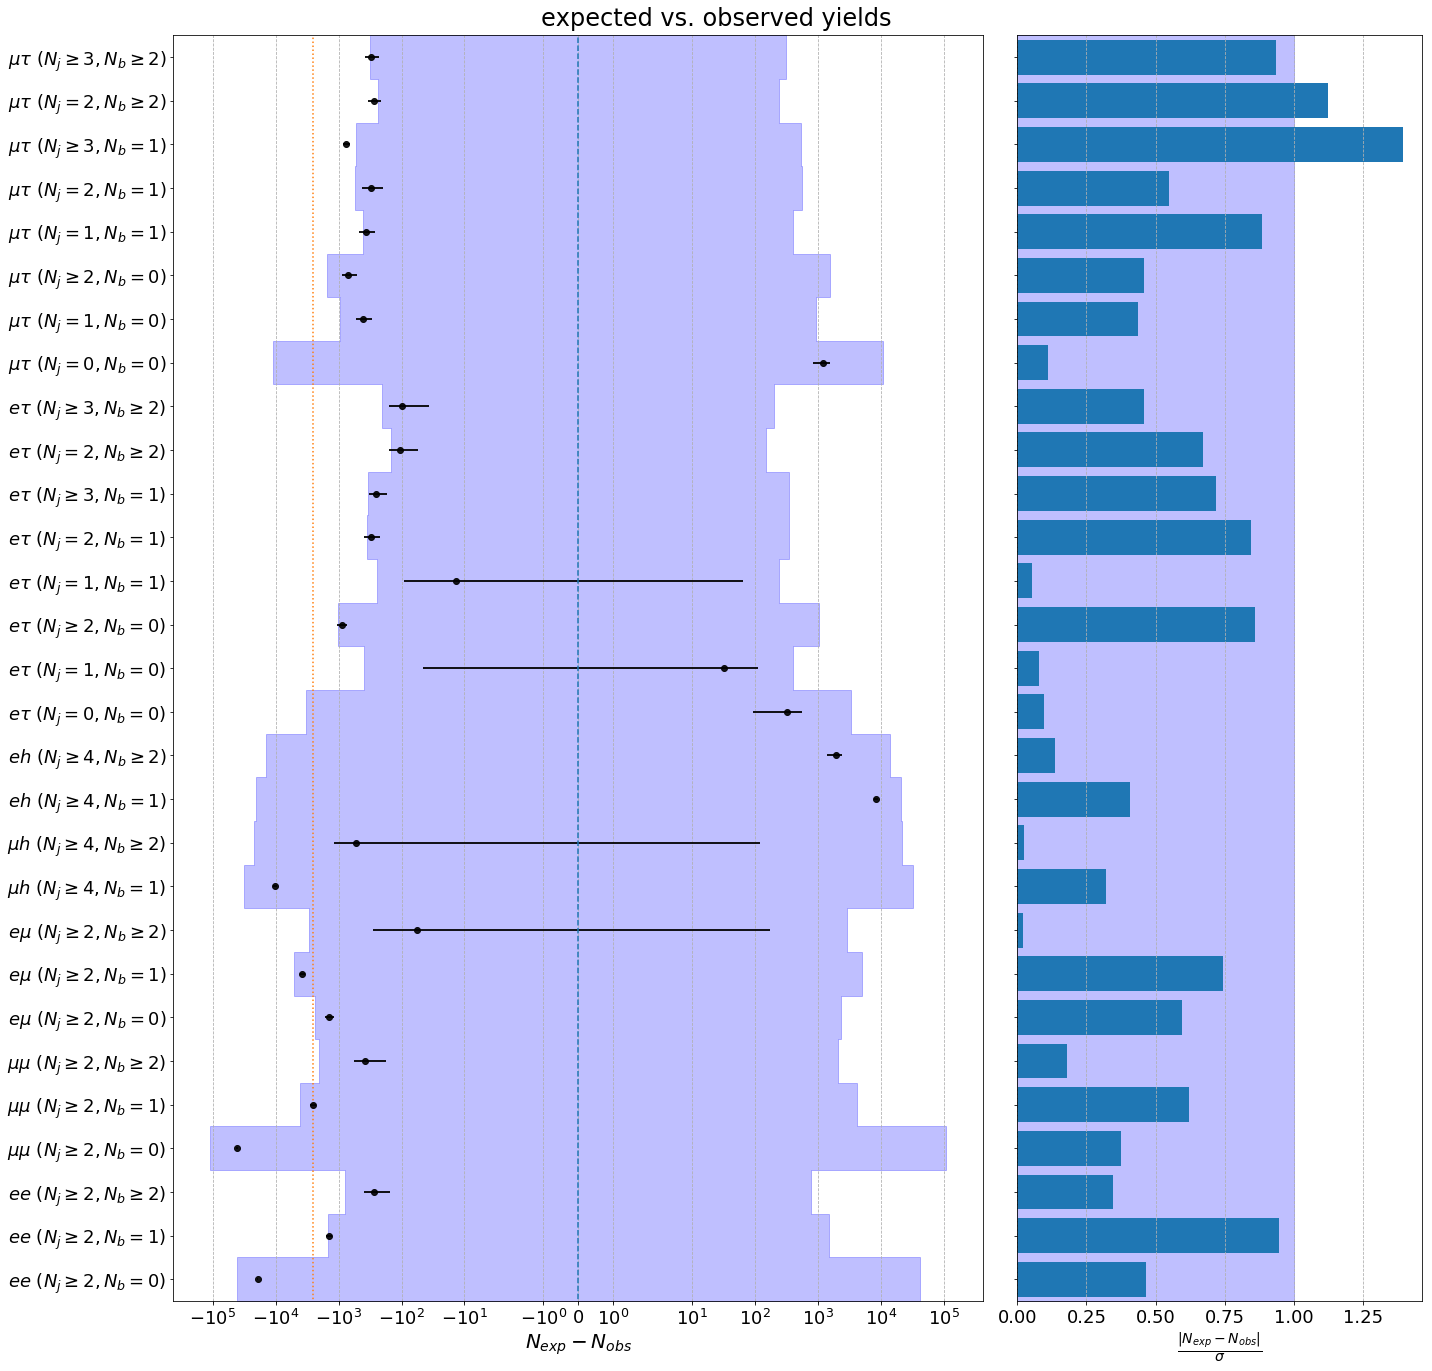

In [10]:
# plot differences between expected and observed yields
fig, axes = plt.subplots(1, 2, figsize=(20, 20), facecolor='white', gridspec_kw={'width_ratios':[2,1]}, sharey=True)
#fig.subplots_adjust(vspace=0)

# plot error bands for expectation
nchannels = df_yields.shape[0]
yticks = np.arange(1, nchannels+1, 1)
exp_err = df_yields.expected_err.values
obs_err = np.sqrt(df_yields.observed.values)

ax = axes[0]
ax.plot([0, 0], [0, nchannels+1], c='C0', linestyle='--')
ax.fill_betweenx(np.concatenate([[0], yticks, [nchannels+1]]),  np.concatenate([[0], -exp_err, [0]]), np.concatenate([[0], exp_err, [0]]), 
                 color = 'b', 
                 alpha = 0.25,
                 step='mid'
                )
ax.errorbar(df_yields['diff'], yticks, xerr=obs_err, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )
bias = np.mean(df_yields['diff'])
ax.plot([bias, bias], [0, nchannels+1], c='C1', linestyle=':')

ax.set_ylim(0.5, nchannels+0.5)
ax.set_xscale('symlog')
#ax.set_xlim(-1.5, 1.5)
ax.set_yticks(yticks)
ax.set_yticklabels(df_yields.labels)
ax.set_xlabel(r'$N_{exp} - N_{obs}$')
ax.grid(linestyle='--', axis='x')

ax = axes[1]
norm_diff = np.abs(df_yields['diff'])/np.sqrt(exp_err**2 + obs_err**2)
ax.barh(yticks, norm_diff)
ax.fill_betweenx([yticks[0]-0.5, yticks[-1]+0.5], [0, 0], [1, 1], color = 'b', alpha = 0.25 , step='mid')
ax.set_xlabel(r'$\frac{\|N_{exp} - N_{obs}\|}{\sigma}$')
ax.grid(linestyle='--', axis='x')

#plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

fig.suptitle('expected vs. observed yields', size=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig(f'plots/systematics/yields_diff.pdf')
plt.show()